 # <div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> whether data forecasting 8 cities in India (1990 - 2022)</h2>
</div>
 <font color = 'yellow'>==========================================================================================</font>

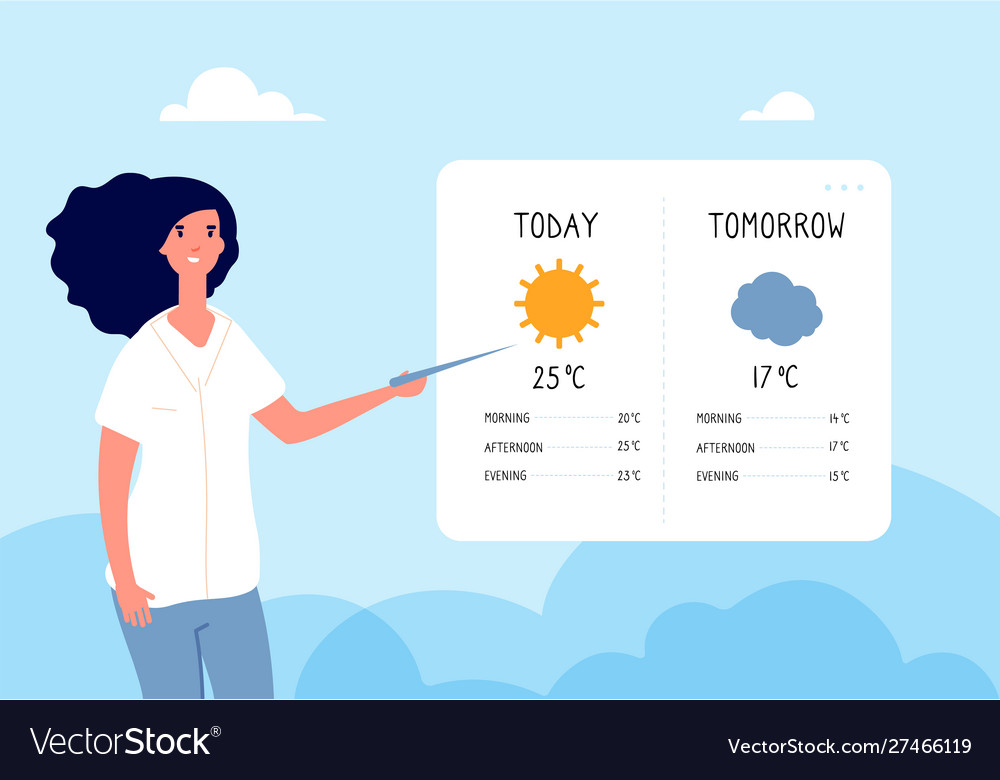


 # <font color='red'> Data Description</font>

<font color='blue'>About Dataset </font>

Any Data is as good as its Description, so here's a brief explanation:

The following data set contains Temperature data (Minimum, Average, Maximum) in degrees Centigrade and Precipitation data in mm.

This data set contains daily Temperature and Precipitation data from 01/01/1990 to 20/07/2022.
Data for the following cities is present :

<font color='green'>*Delhi</font><br> 
<font color='green'>*Bangalore</font><br>
<font color='green '>*Chennai</font><br> 
<font color='green'>*Lucknow</font><br>
<font color='green'>*Rajasthan</font><br>
<font color='green'>*Mumbai</font><br>
<font color='green'>*Bhubaneswar</font><br>
<font color='green'>*Rourkela</font> 

The station Geolocation file will give you the approximate location from where these measurements are taken.

What Can you do with this Data Set ?

* Can you Find the hottest/coldest years for each city?
* Can you Find precipitation averages and tell when rainfall was abnormally less or abnormally more?
* Can you Prove that temperature is increasing and if so at what rate (degree increase/ year)?
* Can you create Effective Visualization to convey the same?

Note: This Data set is ideal for Beginners and college students to hone their data science and Visualization skills

# <font color = green> some wheather key points </font>

- <font color = red>precipitaion</font> is  process of water form in the sky which form as the clouds,
    the rapid temperature increases water evoparates from the  water bodies and  vapour froms in sky.
    the air hits with certain speed at the clouds and clouds turns to cool by condense,
    again the air get warm and hits the cloud,that forms water droplates and form a rain.
    <br>

- The maximum amount of water vapour in the air depends on air temperature. Relative humidity (RH) defined in percentage as, how much water vapour(absolute humidity) is in the air relative to the maximum amount of water vapour (saturated humidity) at the same temperature and pressure. 
<br>
- <a href="https://www.smartfog.com/how-rain-and-humidity-connected.html">how-rain-and-humidity-connected</a>, If the air is cooler, the water will reduce the humidity level and actually make it seem cooler than the temperature outside.
<br>
- Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc. This happens when the air cools and relative humidity rises to 100% so the air cannot hold as much water vapour
- The seasons are defined as

<pre>

**spring (March, April, May),
summer(June, July, August), 
autumn(September, October, November) and
winter(December, January, February)** 

# <font color = 'purple'> DATA WRANGLING</font>
## ===================

 
### ---<font color = GREEN> Importing libraries for  Analysis</font>--- 

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston



# itertools is library for permutations and combinations 
# KPI - Key Performance Indicator
 # deadline 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
 

### <font color ='skyblue' >IMPORTING DATA</font>

In [47]:
delhi  = pd.read_csv("Delhi_NCR_1990_2022_Safdarjung.csv")

In [48]:
rajasthan = pd.read_csv("Rajasthan_1990_2022_Jodhpur.csv")

In [49]:
bangalore = pd.read_csv("Bangalore_1990_2022_BangaloreCity.csv")

In [50]:
mumbai = pd.read_csv("Mumbai_1990_2022_Santacruz.csv")

In [51]:
bhubhneshwar = pd.read_csv("weather_Bhubhneshwar_1990_2022.csv")

In [52]:
lucknow = pd.read_csv("Lucknow_1990_2022.csv")

In [53]:
chennai = pd.read_csv("Chennai_1990_2022_Madras.csv")

In [54]:
Rourkela =pd.read_csv("weather_Rourkela_2021_2022.csv")



In [55]:
latitude = pd.read_csv("Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv")

In [56]:
latitude.head(20)

,longitude,Latitude,Elevation,Location_Name
0,73.0167,26.3000,217.0,Bangalore
1,80.2500,13.0667,6.0,Chennai
2,77.2000,28.5833,211.0,Delhi
3,80.9330,26.8667,110.0,Lucknow
4,72.8500,19.1167,8.0,Mumbai
5,77.5833,12.9667,920.0,Rajastan
6,85.8333,20.2500,NaN,Bubhneshwar
7,84.8833,22.2167,NaN,Rourkela


In [57]:
#checking first 5 lines of all the datasets

In [58]:
delhi.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0


In [59]:
chennai.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


In [60]:
Rourkela.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-07-06,29.3,26.2,32.6,NaN,NaN,197.0,6.8,NaN,1002.5,NaN
1,2021-07-07,29.7,27.3,33.4,11.1,NaN,199.0,6.9,NaN,1002.2,NaN
2,2021-07-08,27.4,25.8,29.7,66.9,NaN,186.0,6.3,NaN,1001.8,NaN
3,2021-07-09,28.5,26.1,32.1,11.4,NaN,173.0,3.9,NaN,1001.0,NaN
4,2021-07-10,29.0,26.2,32.6,2.7,NaN,121.0,4.6,NaN,1000.9,NaN


In [61]:
bhubhneshwar.head(10)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-06,22.2,12.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-07,20.8,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-08,20.3,13.6,29.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-09,22.3,14.8,31.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-10,21.6,14.5,30.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#only for objects
bhubhneshwar.describe( include='object')


,time
count,11935
unique,11935
top,1990-01-01
freq,1


In [63]:
#only for the numerics
bhubhneshwar.describe(datetime_is_numeric=True)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,11857.000000,9845.000000,11044.000000,6838.000000,0.0,1294.000000,2129.000000,0.0,1243.000000,0.0
mean,26.991617,22.237247,32.996686,7.073603,NaN,169.098145,8.399342,NaN,1007.402896,NaN
std,3.530459,4.515201,3.709543,21.150614,NaN,94.152829,5.386709,NaN,5.756544,NaN
min,15.700000,8.200000,19.400000,0.000000,NaN,0.000000,0.500000,NaN,990.600000,NaN
25%,24.700000,19.000000,30.400000,0.000000,NaN,89.000000,4.500000,NaN,1002.900000,NaN
50%,27.700000,24.000000,32.800000,0.000000,NaN,188.000000,7.000000,NaN,1007.300000,NaN
75%,29.400000,25.600000,35.400000,4.100000,NaN,220.750000,11.000000,NaN,1012.400000,NaN
max,37.400000,31.800000,46.700000,470.900000,NaN,359.000000,33.100000,NaN,1019.300000,NaN


In [64]:
# for All the dataset

bhubhneshwar.describe( include='all')

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,11935,11857.000000,9845.000000,11044.000000,6838.000000,0.0,1294.000000,2129.000000,0.0,1243.000000,0.0
unique,11935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,26.991617,22.237247,32.996686,7.073603,NaN,169.098145,8.399342,NaN,1007.402896,NaN
std,NaN,3.530459,4.515201,3.709543,21.150614,NaN,94.152829,5.386709,NaN,5.756544,NaN
min,NaN,15.700000,8.200000,19.400000,0.000000,NaN,0.000000,0.500000,NaN,990.600000,NaN
25%,NaN,24.700000,19.000000,30.400000,0.000000,NaN,89.000000,4.500000,NaN,1002.900000,NaN
50%,NaN,27.700000,24.000000,32.800000,0.000000,NaN,188.000000,7.000000,NaN,1007.300000,NaN
75%,NaN,29.400000,25.600000,35.400000,4.100000,NaN,220.750000,11.000000,NaN,1012.400000,NaN


In [65]:
lucknow.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,7.2,NaN,18.1,0.0
1,02-01-1990,10.5,NaN,17.2,0.0
2,03-01-1990,10.2,1.8,18.6,NaN
3,04-01-1990,9.1,NaN,19.3,0.0
4,05-01-1990,13.5,NaN,23.8,0.0


In [66]:
rajasthan.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [67]:
bangalore.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [68]:
mumbai.head(10)

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0
5,06-01-1990,25.1,19.8,33.5,0.0
6,07-01-1990,26.0,18.9,33.7,0.0
7,08-01-1990,26.6,18.8,34.6,0.0
8,09-01-1990,25.1,19.0,34.4,0.0
9,10-01-1990,26.8,19.3,34.7,0.0


### filling nan with '0'

In [69]:
bhubhneshwar['tmin'] = bhubhneshwar['tmin'].fillna(0)
bhubhneshwar['tavg'] = bhubhneshwar['tavg'].fillna(0)
bhubhneshwar['tmax'] = bhubhneshwar['tmax'].fillna(0)
bhubhneshwar['prcp'] = bhubhneshwar['prcp'].fillna(0)


In [70]:
# for column in bhubhneshwar
# (bhubhneshwar['year'] == " ").sum()

### <font color = 'brown'>Created new column of cities</font>

In [71]:
bangalore['city-Name'] = 'Bangalore'
chennai['city-Name'] = 'Chennai'
delhi['city-Name'] = 'Delhi'
lucknow['city-Name'] = 'Lucknow'
mumbai['city-Name'] = 'Mumbai'
rajasthan['city-Name'] = 'Rajasthan'
bhubhneshwar['city-Name'] = 'Bhubhneshwar'
Rourkela['city-Name'] = 'Rourkela'




# <font color = 'purple'>merging the data sets
</font>

In [72]:
data = pd.concat([bhubhneshwar,lucknow,rajasthan,mumbai,Rourkela,bangalore,delhi,chennai],axis =0)

In [73]:
 data.head()


,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city-Name
0,1990-01-01,20.1,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
1,1990-01-02,20.7,16.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
3,1990-01-04,18.8,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar


In [74]:
data.tail()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city-Name
11889,21-07-2022,28.4,24.5,32.8,21.1,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
11890,22-07-2022,27.8,24.6,32.2,22.1,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
11891,23-07-2022,27.4,24.7,32.6,18.6,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
11892,24-07-2022,27.8,25.0,33.3,9.1,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
11893,25-07-2022,28.1,25.4,32.6,2.9,NaN,NaN,NaN,NaN,NaN,NaN,Chennai


#### Replacing city names with numbers

In [75]:
# data['city-Name']=data['city-Name'].map({'Chennai': '0', 'Bangalore': '1','Delhi':'2','Lucknow':'3','Mumbai':'4','Rajasthan':'5','Bhubhneshwar':'6','Rourkela':'7'})

In [76]:
Rourkela.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [77]:
bhubhneshwar.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [78]:
# for column in dataset:
#     if 'snow','wdir','wpgt','pres','tsun','wspd' in dataset:
#         column.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)
#     else:
#         print("no coloumn to drop")
        

In [79]:

#bhubhneshwar.prcp.unique().round()

In [80]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


 # Analysis of bhubneshwar

### CHECKING NULL VALUES

In [81]:
# null =data['tavg'].isnull()
# data[null]
             

In [82]:
#spliting the time formate: 1990-01-01 ---- >  1990  01  01
bhubhneshwar[[ "year", "month","day"]] = bhubhneshwar["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [83]:
lucknow[[ "day", "month","year"]] = lucknow["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [84]:
delhi[[ "day", "month","year"]] = delhi["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [85]:
chennai[[ "day", "month","year"]] = chennai["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [86]:
Rourkela[[ "year", "month","day"]] = Rourkela["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [87]:
mumbai[[ "day", "month","year"]] = mumbai["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [88]:
rajasthan[[ "day", "month","year"]] = rajasthan["time"].str.split("-", expand = True)

- <font color = "green">time column has droped perhapes time splitted into day,month,year</font>

In [89]:
bangalore[[ "day", "month","year"]] = bangalore["time"].str.split("-", expand = True)

## droping un wanted  column

In [90]:
bhubhneshwar.drop([['time']],axis=1,inplace=True)

KeyError: "[('time',)] not found in axis"

In [91]:
chennai.drop(['time'],axis=1,inplace=True)

In [92]:
rajasthan.drop(['time'],axis=1,inplace=True)

In [93]:
bangalore.drop(['time'],axis=1,inplace = True)

In [94]:
delhi.drop(['time'],axis=1,inplace=True)

In [95]:
Rourkela.drop(['time'],axis=1,inplace=True)

In [96]:
mumbai.drop(['time'],axis=1,inplace=True)

In [97]:
lucknow.drop(['time'],axis=1,inplace=True)

In [98]:
#check whether the colum time deleted or  not 


-  coumn year having  11849 non-null values  and it is in object 
-  column month having 11849 non-null values and it is in object 
-  column day having 11849 non-null values and it is in object
- so we need to change the datatypes mentioned above

In [99]:
dataset = [bhubhneshwar,chennai,mumbai,bangalore,delhi,lucknow,Rourkela,rajasthan]

### changing datatypes

In [100]:
for data1 in dataset:
    data1.year =data1.year.astype('int64')
    data1.month =data1.month.astype('int64')
    data1.day = data1.day.astype('int64')
    

In [101]:
# for information in dataset:
#     print("\t\n",information.info())

In [102]:
 cities = ['bhubhneshwar','chennai','mumbai','bangalore','delhi','lucknow','Rourkela','rajasthan']
# for dtype in dataset:
#     for i in cities:
#         print(f" \ncity : {i}\n====================\n{dtype.dtypes}")

In [103]:
# for n in range(0,len(cities)):
#     print(n,[cities[:-1]])

-  coumn year having  11849 non-null values  and it is in **object** and changed into **"integer"** 
-  column month having 11849 non-null values and it is in **object** and changed into **"integer"**
-  column day having 11849 non-null values and it is in **object** and changed into **"integer"**
-  we have changed the datatypes mentioned above

## <font color = "Green ">Percentage of missing values in  each dataset</font>

In [104]:
print(round(bhubhneshwar.isnull().sum()/len(bhubhneshwar)*100,2),"\n")
print(round(chennai.isnull().sum()/len(chennai)*100,2),"\n")
print(round(mumbai.isnull().sum()/len(mumbai)*100,2)
     ,"\n")
print(round(bangalore.isnull().sum()/len(bangalore)*100,2)
     )
print(round(delhi.isnull().sum()/len(delhi)*100,2)
     )
print(round(lucknow.isnull().sum()/len(lucknow)*100,2)
     )
print(round(Rourkela.isnull().sum()/len(Rourkela)*100,2)
     )
print(round(rajasthan.isnull().sum()/len(rajasthan)*100,2)
     )

time         0.0
tavg         0.0
tmin         0.0
tmax         0.0
prcp         0.0
city-Name    0.0
year         0.0
month        0.0
day          0.0
dtype: float64 

tavg          0.23
tmin         25.93
tmax          8.57
prcp         41.08
city-Name     0.00
day           0.00
month         0.00
year          0.00
dtype: float64 

tavg          0.09
tmin         20.63
tmax         16.03
prcp         39.36
city-Name     0.00
day           0.00
month         0.00
year          0.00
dtype: float64 

tavg          0.59
tmin         11.68
tmax          5.29
prcp         38.84
city-Name     0.00
day           0.00
month         0.00
year          0.00
dtype: float64
tavg          0.79
tmin         12.91
tmax          4.48
prcp         51.62
city-Name     0.00
day           0.00
month         0.00
year          0.00
dtype: float64
tavg          1.16
tmin         29.55
tmax         13.06
prcp         51.72
city-Name     0.00
day           0.00
month         0.00
year          0.00
dtype:

In [105]:
bhubhneshwar.describe()['prcp']

count    11935.000000
mean         4.052727
std         16.386890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        470.900000
Name: prcp, dtype: float64

In [106]:
chennai.describe()['prcp']

count    7008.000000
mean        6.244378
std        19.039751
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       344.900000
Name: prcp, dtype: float64

In [107]:
lucknow.describe()['prcp']

count    5742.000000
mean        4.535650
std        17.079051
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       470.900000
Name: prcp, dtype: float64

In [108]:
delhi.describe()['prcp']

count    5754.000000
mean        3.662478
std        12.473498
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max       262.900000
Name: prcp, dtype: float64

In [109]:
mumbai.describe()['prcp']

count    7213.000000
mean       10.942007
std        29.808576
min         0.000000
25%         0.000000
50%         0.000000
75%         7.100000
max       461.000000
Name: prcp, dtype: float64

In [110]:
rajasthan.describe()['prcp']

count    7274.000000
mean        4.414119
std        12.994655
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       271.300000
Name: prcp, dtype: float64

In [111]:
chennai.describe()['prcp']

count    7008.000000
mean        6.244378
std        19.039751
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       344.900000
Name: prcp, dtype: float64

In [112]:
bangalore.describe()['prcp']

count    7274.000000
mean        4.414119
std        12.994655
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       271.300000
Name: prcp, dtype: float64

-   in every dataset the mean is less than the standard deviation 

### Replace null values

In [113]:
#bhubhneshwar.replace(np.nan,'0',inplace = True)

#Check the changes now
bhubhneshwar.isnull().sum()
bhubhneshwar['prcp']=bhubhneshwar['prcp'].replace(to_replace = 0.0, value = prcp_mean)



NameError: name 'prcp_mean' is not defined

# Outliers of bhubneshwar

In [114]:
bhubhneshwar.describe()

,tavg,tmin,tmax,prcp,year,month,day
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,26.815216,18.343167,30.533339,4.052727,2005.841810,6.483117,15.724675
std,4.136823,9.394275,9.378371,16.386890,9.434511,3.440538,8.802153
min,0.000000,0.000000,0.000000,0.000000,1990.000000,1.000000,1.000000
25%,24.600000,14.800000,29.700000,0.000000,1998.000000,4.000000,8.000000
50%,27.700000,22.400000,32.400000,0.000000,2006.000000,6.000000,16.000000
75%,29.400000,25.300000,35.000000,0.000000,2014.000000,9.000000,23.000000
max,37.400000,31.800000,46.700000,470.900000,2022.000000,12.000000,31.000000


In [115]:
prcp_mean = bhubhneshwar['prcp'].mean()

In [116]:
bhubhneshwar.describe()[["tavg", "tmax"]]

,tavg,tmax
count,11935.000000,11935.000000
mean,26.815216,30.533339
std,4.136823,9.378371
min,0.000000,0.000000
25%,24.600000,29.700000
50%,27.700000,32.400000
75%,29.400000,35.000000
max,37.400000,46.700000


<AxesSubplot:>

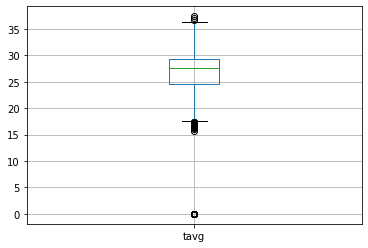

In [117]:
bhubhneshwar.boxplot(column=['tavg'],grid=True,fontsize='10')

average tempertaure having less outliers only one side

<AxesSubplot:>

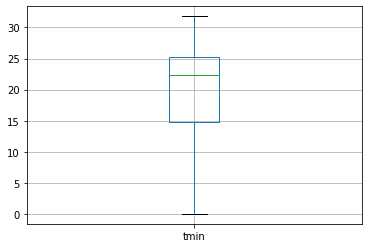

In [118]:
bhubhneshwar.boxplot(column=['tmin'],grid=True,fontsize='10',)

compare to the column tmin has the less outliers and that too one side

<AxesSubplot:>

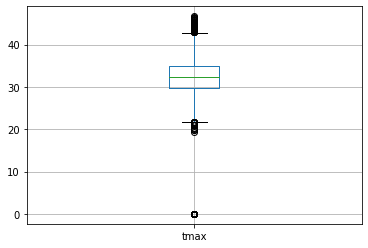

In [119]:
bhubhneshwar.boxplot(column=['tmax'],grid=True,fontsize='10',)

<AxesSubplot:>

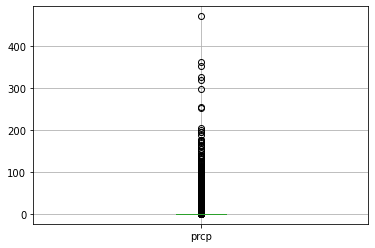

In [120]:
bhubhneshwar.boxplot(column=['prcp'],grid=True,fontsize='10',)

this column has the outliers approximate all are out of the boundary

<AxesSubplot:xlabel='tmin'>

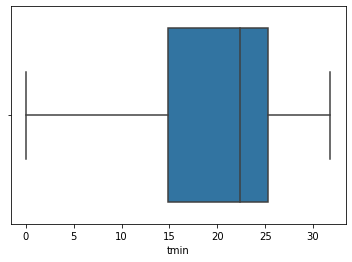

In [121]:
sns.boxplot(bhubhneshwar['tmin'])

<AxesSubplot:>

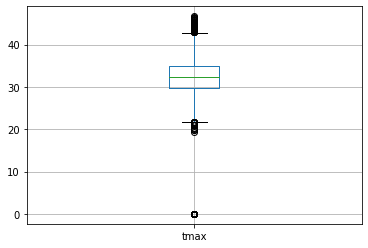

In [122]:
bhubhneshwar.boxplot(column=['tmax'],grid=True,fontsize='10',)

<AxesSubplot:>

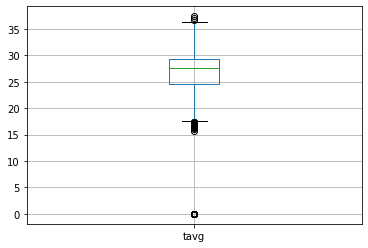

In [123]:
bhubhneshwar.boxplot(column=['tavg'],grid=True,fontsize='10')

 ## <font color = "green"> Seprating tmax column from outlier</font>

In [124]:

 
''' Detection '''

Q1 = np.percentile(bhubhneshwar['tmax'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bhubhneshwar['tmax'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", bhubhneshwar.shape)

 
# Upper bound
#upper = np.where((bhubhneshwar['tmax']>42.89)) 
upper1 = np.where(bhubhneshwar['tmax'] >= (Q3+1.5*IQR))
# Lower bound

#lower = np.where(bhubhneshwar['tmax']<23)
lower1 = np.where(bhubhneshwar['tmax'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
bhubhneshwar.drop(upper1[0], inplace = True)
bhubhneshwar.drop(lower1[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


Old Shape:  (11935, 9)
New Shape:  (10969, 9)


 ## <font color = "green"> Seprating tmin column from outlier</font>

In [125]:

 
''' Detection '''
# IQR
Q1 = np.percentile(bhubhneshwar['tmin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bhubhneshwar['tmin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", bhubhneshwar.shape)

''' Upper bound'''
#upper = np.where(bhubhneshwar['tmax'] >= (Q3+1.5*IQR))

"""Lower bound"""
#lower1 = np.where(bhubhneshwar['tmin']<9.8)

#lower = np.where(bhubhneshwar['tmax']<24)
#lower = np.where(bhubhneshwar['tmax'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
#bhubhneshwar.drop(upper1[0], inplace = True)
#bhubhneshwar.drop(lower1[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


Old Shape:  (10969, 9)
New Shape:  (10969, 9)


 ## <font color = "green"> Seprating tavg column from outlier</font>

In [126]:

 
''' Detection '''
# IQR
avg_Q1 = np.percentile(np.sort(bhubhneshwar['tavg']), 25,
                   interpolation = 'midpoint')
 
avg_Q3 = np.percentile(bhubhneshwar['tavg'], 75,interpolation = 'midpoint')
avg_IQR = avg_Q3 - avg_Q1
 
print("Old Shape: ", bhubhneshwar.shape)

''' Upper bound'''
upper2 = np.where(bhubhneshwar['tavg'] >= (avg_Q3+1.5*avg_IQR))

"""Lower bound"""
lower2 = np.where(bhubhneshwar['tmax'] <= (avg_Q1-1.5*avg_IQR))
 
''' Removing the Outliers '''
bhubhneshwar.drop(upper2[0], inplace = True)
bhubhneshwar.drop(lower2[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


Old Shape:  (10969, 9)
New Shape:  (10969, 9)


10.200000000000001
15.1 25.3 10.200000000000001
24.7
29.4
4.699999999999999


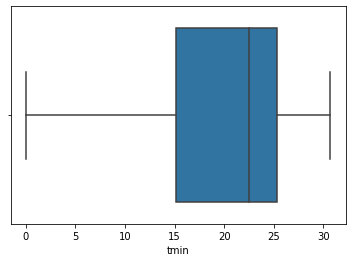

In [127]:
print(IQR) 
upper1

print(Q1,Q3,IQR)

sns.boxplot(bhubhneshwar["tmin"])

sorted1 = np.sort(bhubhneshwar['tavg'])

sorted1

print(avg_Q1)
print(avg_Q3)
print(avg_IQR)

<AxesSubplot:xlabel='tavg'>

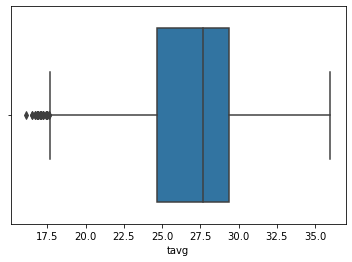

In [128]:
sns.boxplot(bhubhneshwar['tavg'])

### HISTOGRAM

In [129]:
bhubhneshwar['prcp']=bhubhneshwar['prcp'].replace(to_replace = 0.0, value = prcp_mean)

array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'prcp'}>,
        <AxesSubplot:title={'center':'snow'}>,
        <AxesSubplot:title={'center':'wdir'}>],
       [<AxesSubplot:title={'center':'wspd'}>,
        <AxesSubplot:title={'center':'wpgt'}>,
        <AxesSubplot:title={'center':'pres'}>],
       [<AxesSubplot:title={'center':'tsun'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

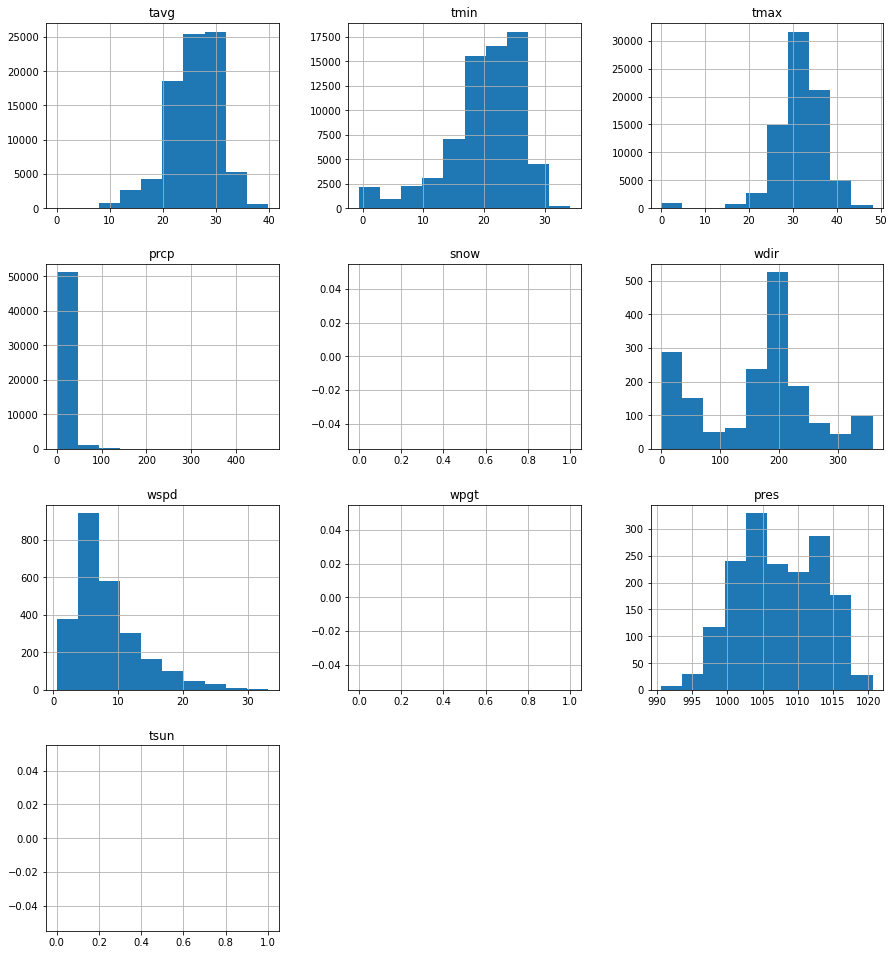

In [130]:
data.hist(figsize=(15,30),layout=(7,3)) 


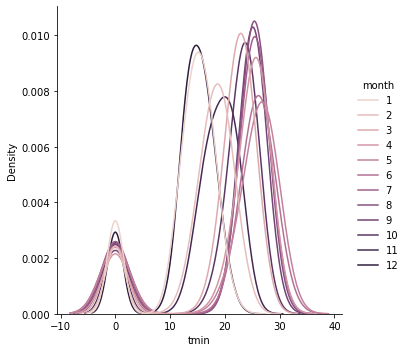

In [131]:
sns.displot(data=bhubhneshwar, x='tmin', hue='month',kind='kde')

In [132]:
#sns.pairplot()

In [133]:
#Normality test is used to check whether the dataset set follows normal distribution (Null hypothesis) or not (alternative hypothesis).

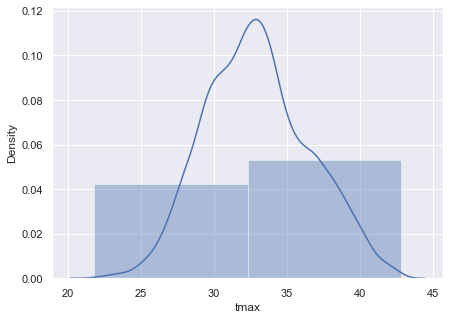

In [134]:
# from scipy.stats import norm
    
# numargs = norm.numargs 
# a, b = 4.32, 3.18
# rv = norm(a, b) 
    
# print ("RV : \n", rv)
sns.set(rc={'figure.figsize':(7,5)}) # rc = low column
# plot a histogram showing the distribution of the target values
sns.distplot(bhubhneshwar.tmax, bins=2) #displot is used for the ploting histogram ////bins  = number of bars
plt.show() 

In [135]:
median= bhubhneshwar['prcp'].mean()

In [136]:
bhubhneshwar.describe()

,tavg,tmin,tmax,prcp,year,month,day
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,26.976260,18.543030,32.957225,7.119690,2005.990245,6.497311,15.711004
std,3.482796,9.224231,3.595113,15.659606,9.332001,3.450655,8.796984
min,16.100000,0.000000,21.800000,0.100000,1990.000000,1.000000,1.000000
25%,24.700000,15.100000,30.400000,4.052727,1998.000000,3.000000,8.000000
50%,27.700000,22.500000,32.800000,4.052727,2006.000000,7.000000,16.000000
75%,29.400000,25.300000,35.300000,4.052727,2014.000000,9.000000,23.000000
max,36.000000,30.700000,42.800000,470.900000,2022.000000,12.000000,31.000000


In [ ]:
corr = bhubhneshwar.corr() # Finding out the correlation between the features
sns.set(rc={'figure.figsize': (10,10)}) # Plotting the heatmap of correlation between features
sns.heatmap(corr, annot = True, cmap='summer' ,fmt = '.4g')  #fmt is based on the continues variable

In [ ]:
#inferential statistics


# scatter plot 

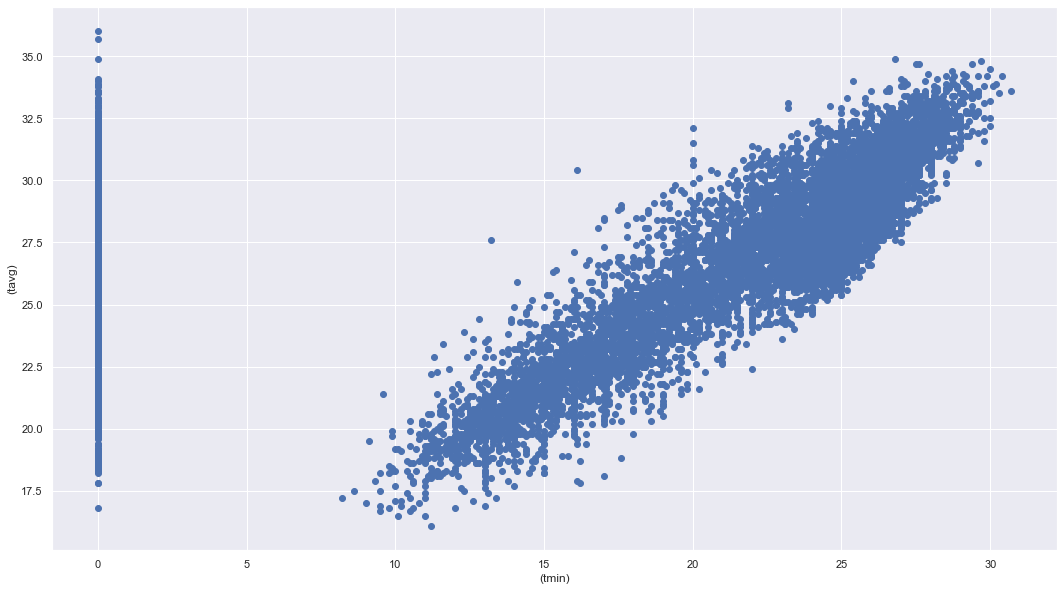

In [147]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bhubhneshwar['tmin'],bhubhneshwar['tavg'])

ax.set_xlabel('(tmin)')

ax.set_ylabel('(tavg)')
plt.show()

In [ ]:


### correlation

In [148]:
correlation = bhubhneshwar.corr()

In [149]:
print("\n***correlation***")
correlation


***correlation***


,tavg,tmin,tmax,prcp,year,month,day
tavg,1.000000,0.378301,0.826191,-0.014049,0.032755,-0.119259,-0.000477
tmin,0.378301,1.000000,0.241078,0.059049,0.109447,0.006450,0.008941
tmax,0.826191,0.241078,1.000000,-0.158744,0.015372,-0.300324,-0.003495
prcp,-0.014049,0.059049,-0.158744,1.000000,-0.024462,0.061999,-0.005360
year,0.032755,0.109447,0.015372,-0.024462,1.000000,-0.021305,0.003165
month,-0.119259,0.006450,-0.300324,0.061999,-0.021305,1.000000,0.007345
day,-0.000477,0.008941,-0.003495,-0.005360,0.003165,0.007345,1.000000


correlation


<AxesSubplot:>

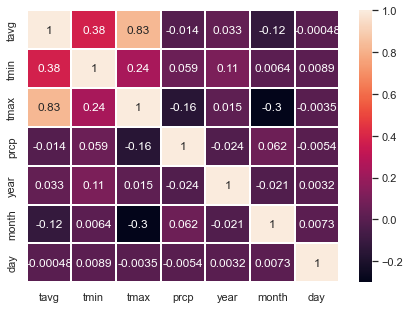

In [150]:
print("correlation")
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot = True,linewidths=2,
    linecolor='white')

In [ ]:
bhubhneshwar.head()

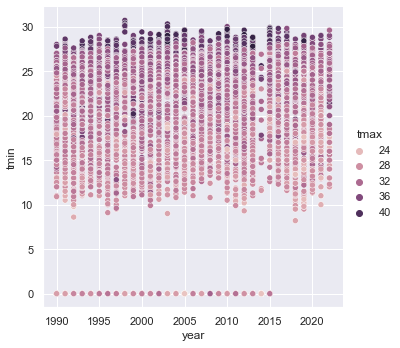

In [151]:
sns.relplot(y='tmin', x = 'year', hue = 'tmax',data = bhubhneshwar )

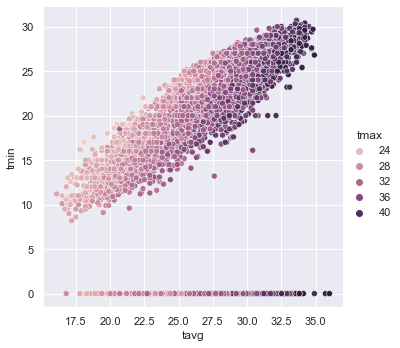

In [152]:
sns.relplot(x ='tavg', y = 'tmin', hue = 'tmax',data = bhubhneshwar )

In [ ]:
# sns.displot(x = bhubhneshwar['tmin'], y = bhubhneshwar['tavg'] ,kind ='hist')

In [ ]:
# bhubhneshwar.groupby("year",dropna=True).head()

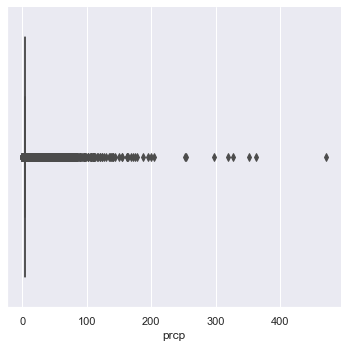

In [153]:
sns.catplot(x = 'prcp',kind = 'box',data = bhubhneshwar)

In [ ]:
# sns.kdeplot(x = 'prcp', y = 'tmax',data = bhubhneshwar , hue = 'tmin')

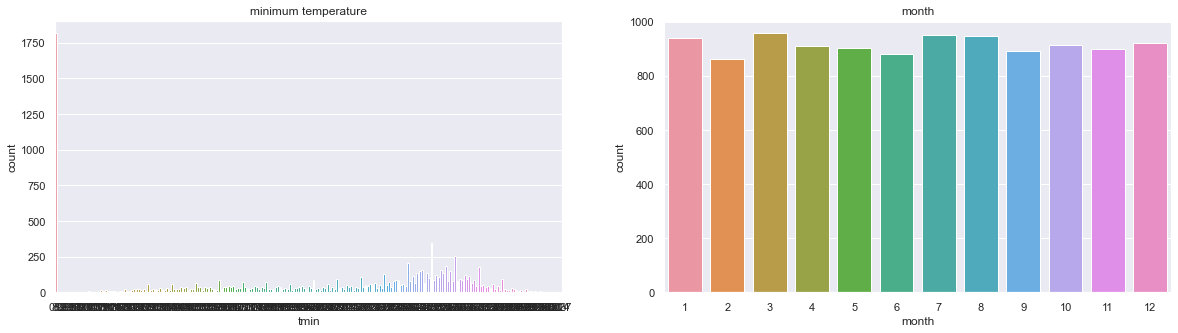

In [154]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('minimum temperature')
ax=sns.countplot(x="tmin",data=bhubhneshwar,ax=ax1)
ax2.set_title('month')
ax=sns.countplot(x="month",data=bhubhneshwar,ax=ax2)

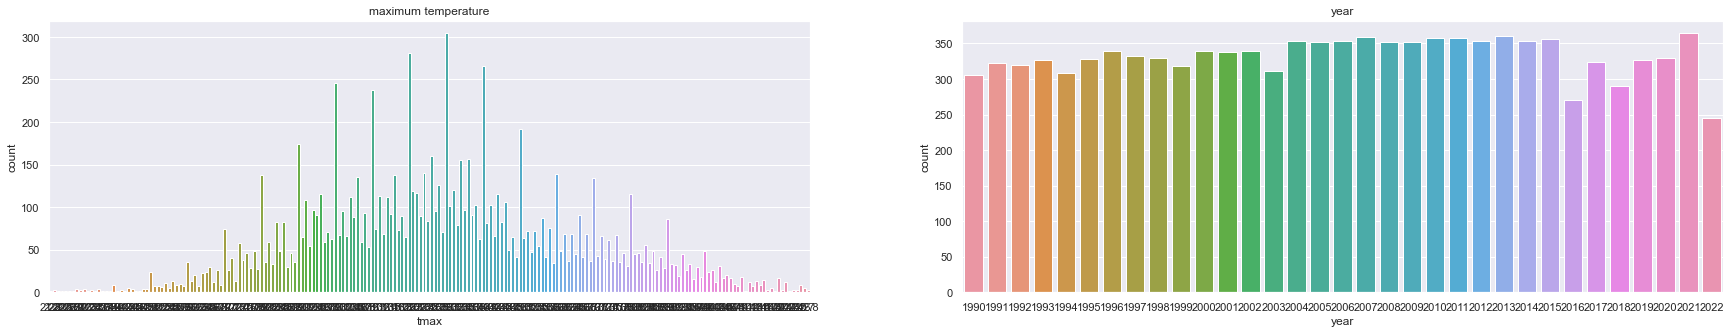

In [155]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,5))
ax1.set_title('maximum temperature')
ax=sns.countplot(x="tmax",data=bhubhneshwar,ax=ax1)
ax2.set_title('year')
ax=sns.countplot(x="year",data=bhubhneshwar,ax=ax2)

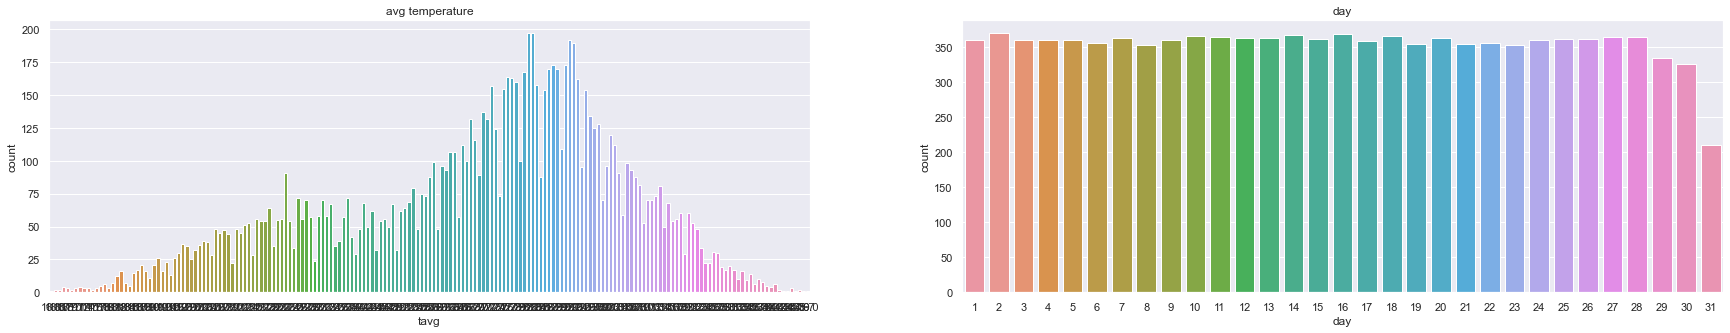

In [156]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,5))
ax1.set_title('avg temperature')
ax=sns.countplot(x="tavg",data=bhubhneshwar,ax=ax1)
ax2.set_title('day')
ax=sns.countplot(x="day",data=bhubhneshwar,ax=ax2)

In [157]:
bhubhneshwar.describe()

,tavg,tmin,tmax,prcp,year,month,day
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,26.976260,18.543030,32.957225,7.119690,2005.990245,6.497311,15.711004
std,3.482796,9.224231,3.595113,15.659606,9.332001,3.450655,8.796984
min,16.100000,0.000000,21.800000,0.100000,1990.000000,1.000000,1.000000
25%,24.700000,15.100000,30.400000,4.052727,1998.000000,3.000000,8.000000
50%,27.700000,22.500000,32.800000,4.052727,2006.000000,7.000000,16.000000
75%,29.400000,25.300000,35.300000,4.052727,2014.000000,9.000000,23.000000
max,36.000000,30.700000,42.800000,470.900000,2022.000000,12.000000,31.000000


<Figure size 504x360 with 0 Axes>

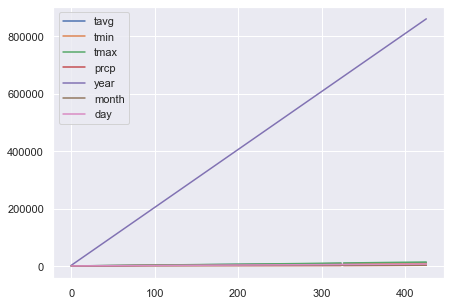

In [158]:

Rourkela= Rourkela.cumsum()

plt.figure();

Rourkela.plot();

<AxesSubplot:>

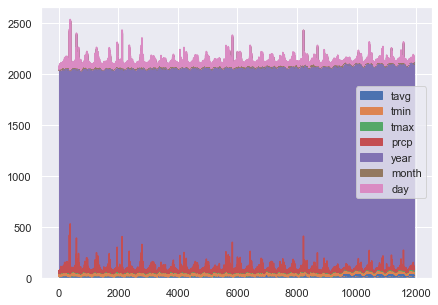

In [159]:
bhubhneshwar.plot.area(stacked = True)

<AxesSubplot:xlabel='year', ylabel='tmax'>

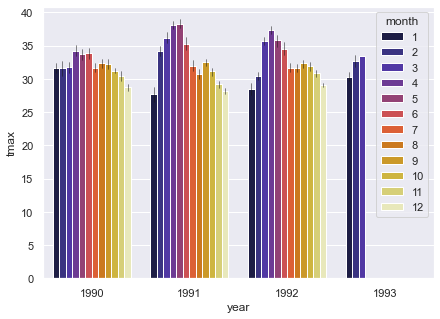

In [160]:
sns.barplot(
        bhubhneshwar['year'].head(1000),
            bhubhneshwar['tmax'].head(1000),
      
            hue = bhubhneshwar['month'],
            color = 'r',
            palette="CMRmap",
            saturation=0.75,
            errcolor='.08'
            ,errwidth=0.5,
    orient='v')


<AxesSubplot:xlabel='year', ylabel='tmax'>

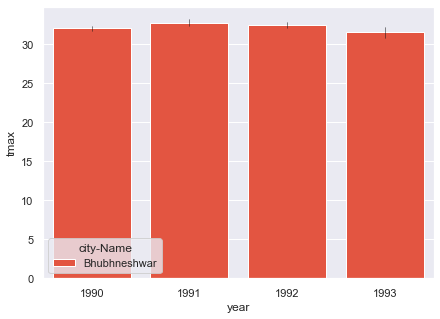

In [161]:
sns.barplot(
        bhubhneshwar['year'].head(1000),
            bhubhneshwar['tmax'].head(1000),
      
            hue = bhubhneshwar['city-Name'],
            dodge=True,
            palette="CMRmap",
            saturation=0.75,
            errcolor='.08'
            ,errwidth=0.5,
    orient='v')


<AxesSubplot:xlabel='day', ylabel='tmin'>

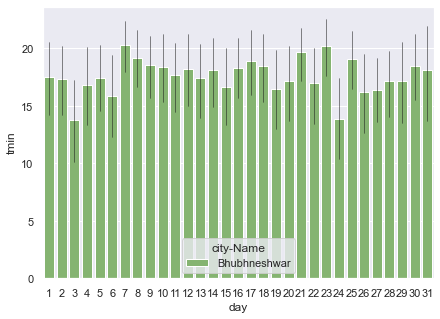

In [162]:
sns.barplot(
        bhubhneshwar['day'].head(1000),
            bhubhneshwar['tmin'].head(1000),
           
            hue = bhubhneshwar['city-Name'],
            
            palette="summer",
            saturation=0.75,
            errcolor='.08'
            ,errwidth=0.5,
    orient='v')


In [163]:
bhubhneshwar.describe()

,tavg,tmin,tmax,prcp,year,month,day
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,26.976260,18.543030,32.957225,7.119690,2005.990245,6.497311,15.711004
std,3.482796,9.224231,3.595113,15.659606,9.332001,3.450655,8.796984
min,16.100000,0.000000,21.800000,0.100000,1990.000000,1.000000,1.000000
25%,24.700000,15.100000,30.400000,4.052727,1998.000000,3.000000,8.000000
50%,27.700000,22.500000,32.800000,4.052727,2006.000000,7.000000,16.000000
75%,29.400000,25.300000,35.300000,4.052727,2014.000000,9.000000,23.000000
max,36.000000,30.700000,42.800000,470.900000,2022.000000,12.000000,31.000000


# categorical columns   




In [164]:
bhubhneshwar.dtypes

time          object
tavg         float64
tmin         float64
tmax         float64
prcp         float64
city-Name     object
year           int64
month          int64
day            int64
dtype: object

In [165]:
bhubhneshwar['prcp'].head(100)

0       4.052727
2       4.052727
3       4.052727
4       4.052727
7       4.052727
8       4.052727
9       4.052727
10      4.052727
11      4.052727
12      4.052727
13      4.052727
14      4.052727
15      4.052727
17      4.052727
18      4.052727
19      4.052727
20      4.052727
21      4.052727
22      4.052727
23      4.052727
24      4.052727
25      4.052727
26      4.052727
27      4.052727
29      4.052727
30      4.052727
31      4.052727
32      4.052727
33      4.052727
34      4.052727
35      4.052727
36      4.052727
37      4.052727
40      4.052727
41      4.052727
42      4.052727
43      4.052727
44      4.052727
45      5.100000
46      6.600000
47      4.052727
48      9.100000
49      4.052727
51     14.700000
52      4.052727
54      5.300000
57      4.052727
58      4.052727
59      4.052727
60      4.052727
61     52.300000
62      3.000000
64      4.052727
65      7.400000
66      4.052727
67      4.052727
68      4.052727
69      4.052727
70      4.0527

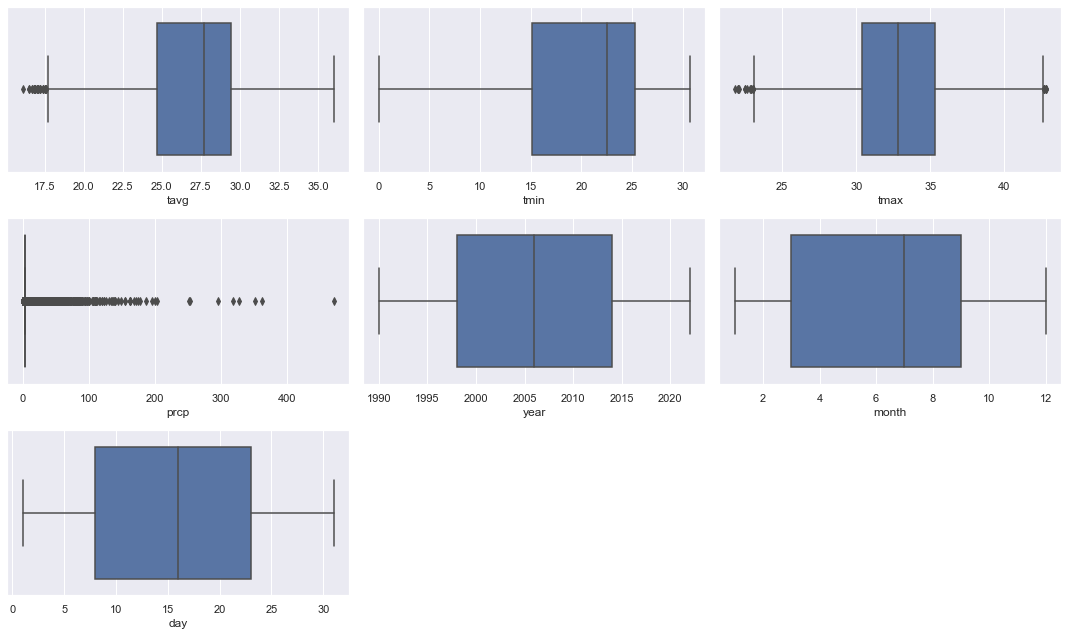

In [166]:
cols =3
rows = 3
num_cols = bhubhneshwar.select_dtypes(exclude = 'object').columns
fig = plt.figure(figsize = (15,9))
for i ,col in enumerate(num_cols ):
    ax = fig.add_subplot(rows,cols, i+1)
    sns.boxplot(x = bhubhneshwar[col],  ax = ax )

fig.tight_layout()
plt.show()
    

# Bivariuate analysis

<AxesSubplot:>

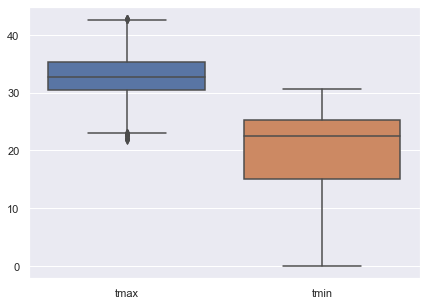

In [167]:
sns.boxplot(data = bhubhneshwar.loc[: ,['tmax','tmin']])

<AxesSubplot:>

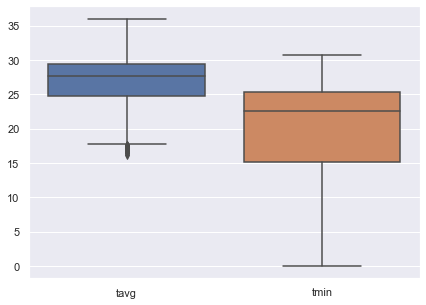

In [168]:
sns.boxplot(data = bhubhneshwar.loc[: ,['tavg','tmin']])

<AxesSubplot:>

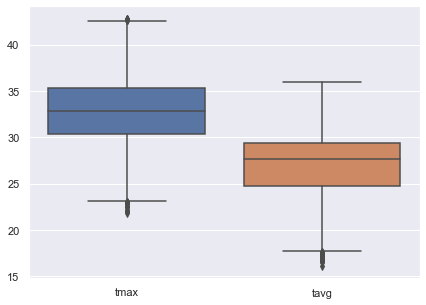

In [169]:
sns.boxplot(data = bhubhneshwar .loc[: ,['tmax','tavg']])

<AxesSubplot:xlabel='tavg', ylabel='month'>

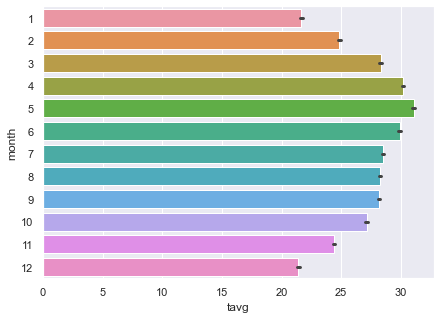

In [170]:
sns.barplot(data = bhubhneshwar,x = 'tavg',y = 'month',orient = "h",errwidth= '2.99',)

<AxesSubplot:xlabel='tmin', ylabel='month'>

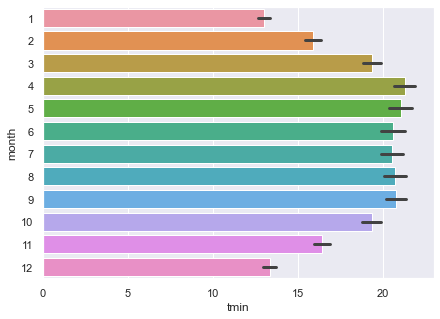

In [171]:
sns.barplot(data = bhubhneshwar,x = 'tmin',y = 'month',orient = "h",errwidth= '2.99',)

<AxesSubplot:xlabel='tmax', ylabel='month'>

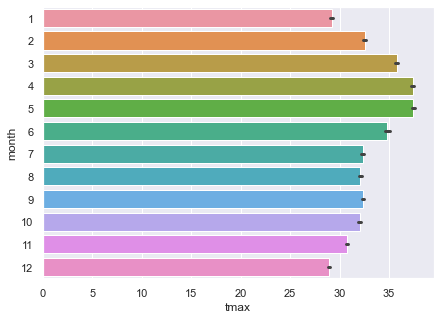

In [172]:
sns.barplot(data = bhubhneshwar,x = 'tmax',y = 'month',orient = "h",errwidth= '2.99',)

<AxesSubplot:xlabel='prcp', ylabel='month'>

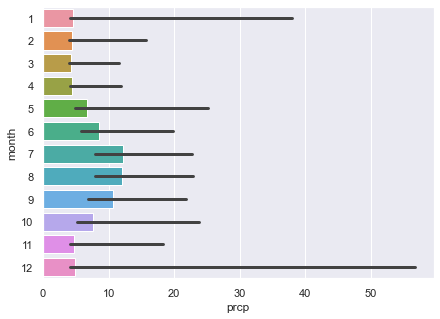

In [173]:
sns.barplot(data = bhubhneshwar,x = 'prcp',y = 'month',orient = "h",errwidth= '2.99',units= bhubhneshwar['prcp'])

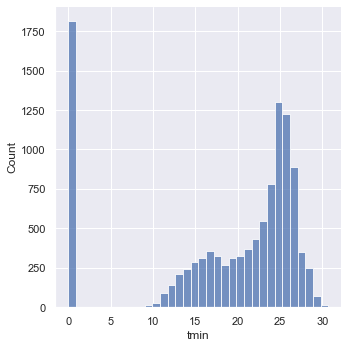

In [174]:
sns.displot(data = bhubhneshwar,x = "tmin",legend=True)

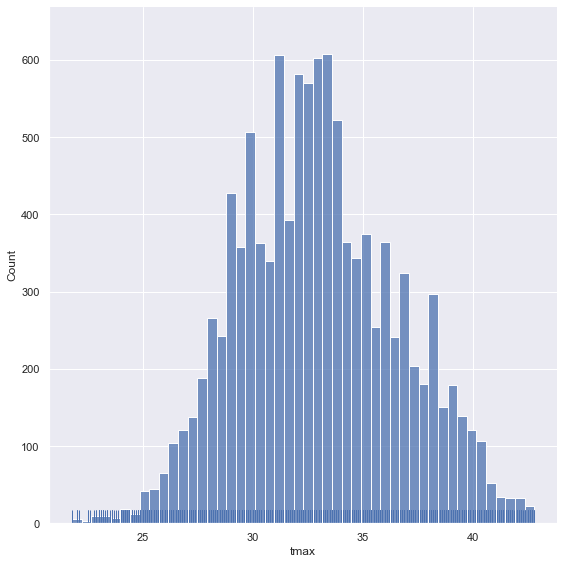

In [175]:
sns.displot(data = bhubhneshwar,x = "tmax",legend=True, rug  = True, height=8,
    aspect=1)

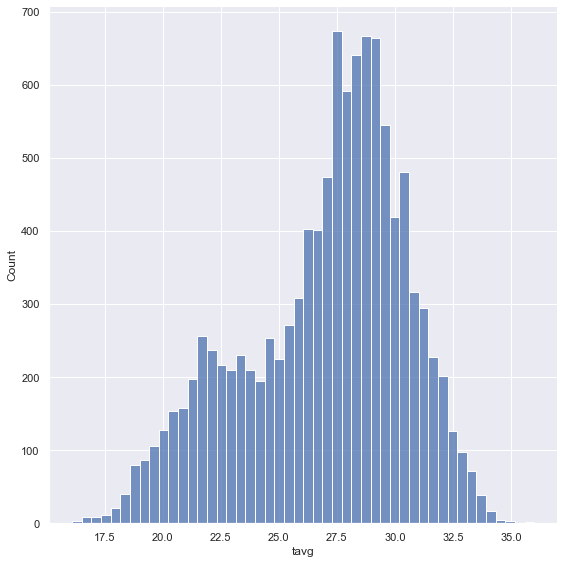

In [176]:
sns.displot(data = bhubhneshwar,x = "tavg",height= 8)

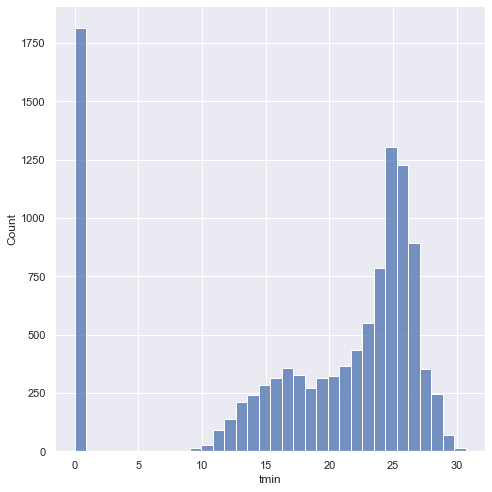

In [177]:
sns.displot(data = bhubhneshwar,x = "tmin",height= 7)


In [178]:
#stacked plot


In [179]:
 bhubhneshwar.head()

,time,tavg,tmin,tmax,prcp,city-Name,year,month,day
0,1990-01-01,20.1,0.0,28.0,4.052727,Bhubhneshwar,1990,1,1
2,1990-01-03,20.7,16.0,27.4,4.052727,Bhubhneshwar,1990,1,3
3,1990-01-04,18.8,0.0,28.0,4.052727,Bhubhneshwar,1990,1,4
4,1990-01-05,19.8,11.0,28.2,4.052727,Bhubhneshwar,1990,1,5
7,1990-01-08,20.3,13.6,29.5,4.052727,Bhubhneshwar,1990,1,8


### precipitation and temperature according to month

<AxesSubplot:title={'center':'maximum temperature & precipatation'}, xlabel='maximum temperature', ylabel='percipitaion'>

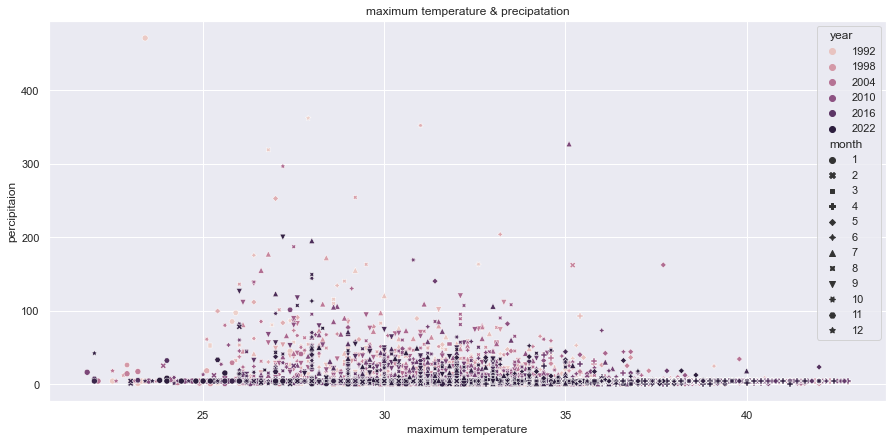

In [180]:
plt.figure(figsize=(15,7))
plt.title('maximum temperature & precipatation')
plt.xlabel('maximum temperature')
plt.ylabel('percipitaion')
sns.scatterplot(bhubhneshwar['tmax'],bhubhneshwar['prcp'],hue =bhubhneshwar['year'] , markers=True,style = bhubhneshwar['month'])


### precipitation and temperature according to year

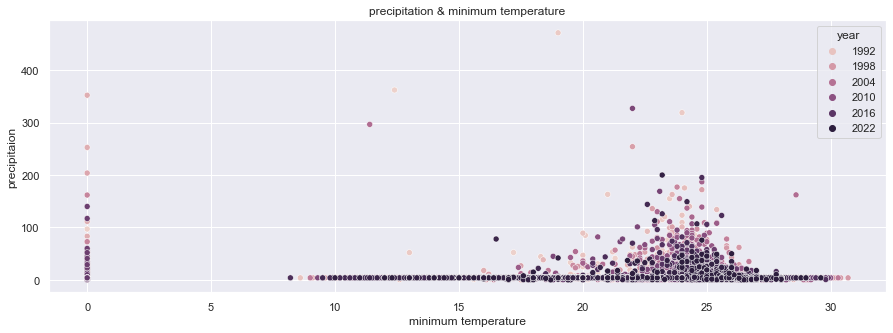

In [181]:
plt.figure(figsize=(15,5))
plt.title('precipitation & minimum temperature')
plt.xlabel('minimum temperature')
plt.ylabel('precipitaion')
sns.scatterplot(bhubhneshwar['tmin'],bhubhneshwar['prcp'],hue = bhubhneshwar['year'])
plt.show()


### precipitation and temperature according to day

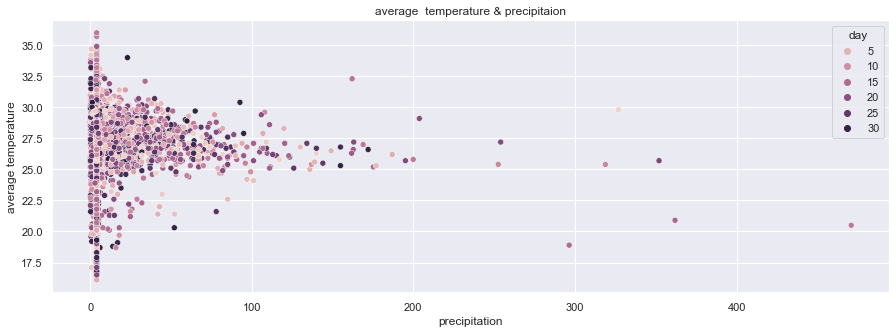

In [182]:
plt.figure(figsize=(15,5))
plt.title('average  temperature & precipitaion')
plt.xlabel('precipitation')
plt.ylabel('average temperature')
sns.scatterplot(bhubhneshwar['prcp'],bhubhneshwar['tavg'],hue = bhubhneshwar['day'])
plt.show()


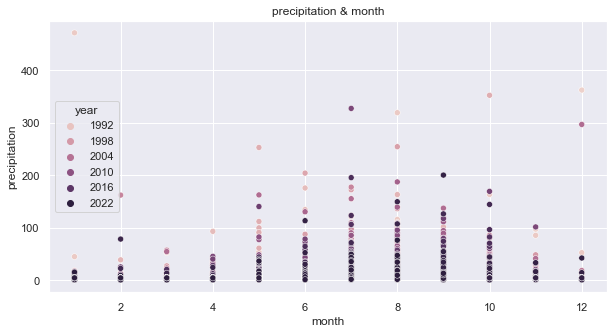

In [183]:
plt.figure(figsize=(10,5))
plt.title('precipitation & month')
plt.xlabel('month')
plt.ylabel('precipitation')
sns.scatterplot(bhubhneshwar['month'],bhubhneshwar['prcp'],bhubhneshwar['year'])
plt.show()


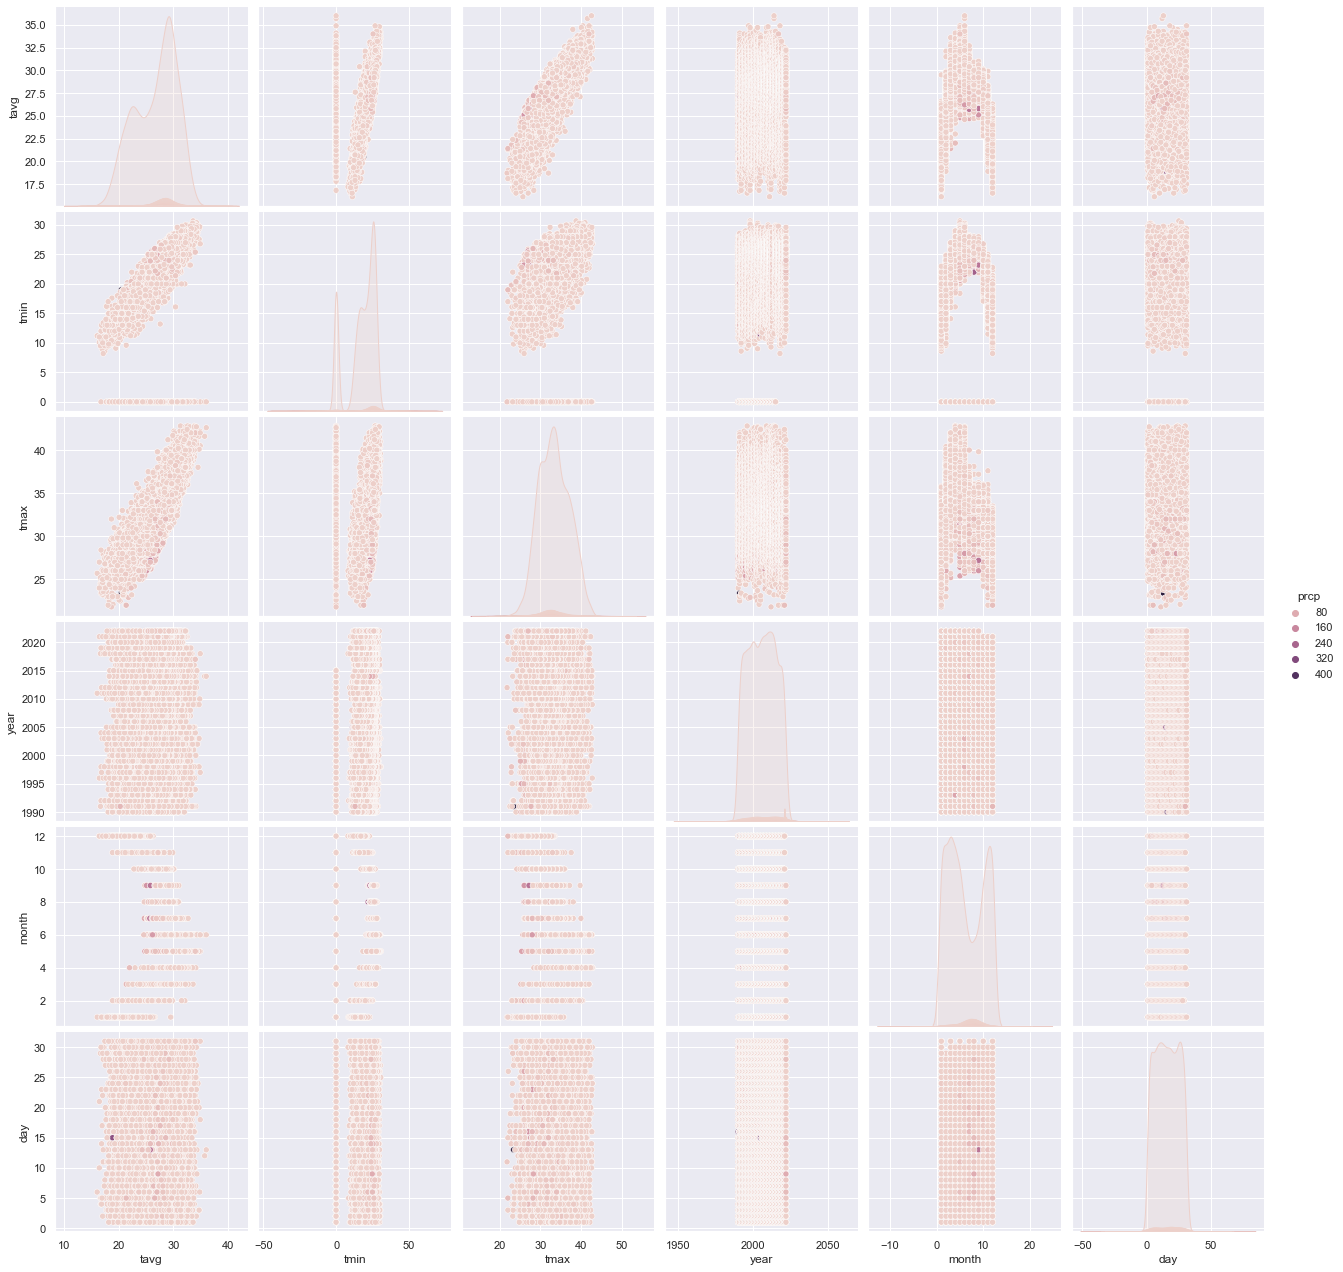

In [184]:
sns.pairplot(bhubhneshwar,hue = "prcp", height=3,
    aspect=1,
    corner=False,
    dropna=True,
    size = 3)

## statistical analysis

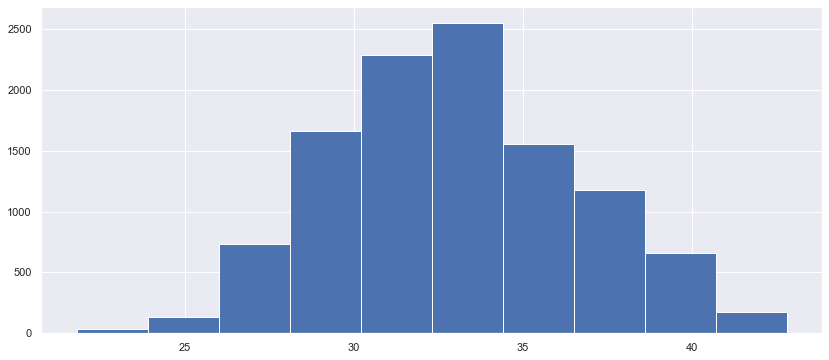

In [185]:
#Cheking Histogram
import matplotlib.pyplot as pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(bhubhneshwar['tmax'])
pyplot.show()

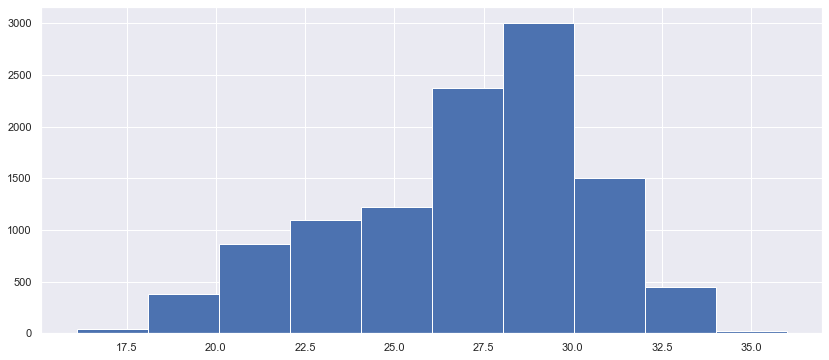

In [186]:


%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(bhubhneshwar['tavg'])
pyplot.show()

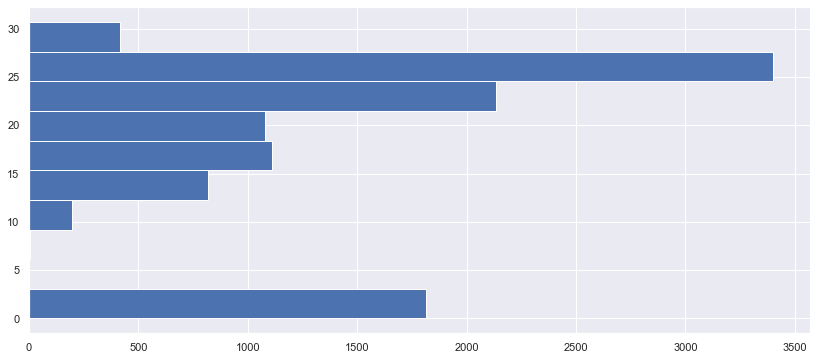

In [187]:
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(bhubhneshwar['tmin'] ,align='mid',
    orientation='horizontal',stacked=True)
pyplot.show()

array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'prcp'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

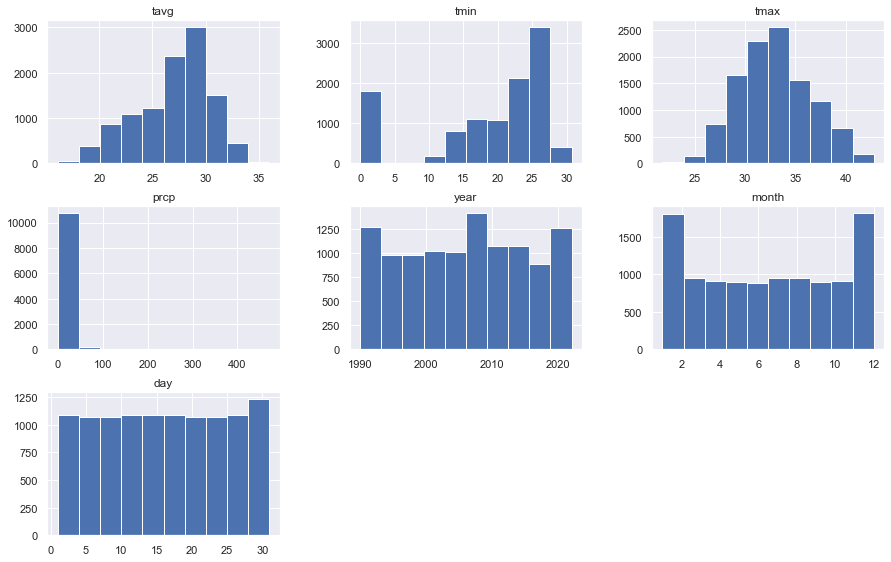

In [188]:
bhubhneshwar.hist(figsize=(15,30),layout=(9,3),  ylabelsize=11, xlabelsize = 11) 


In [189]:
#Help from Python
from scipy.stats import shapiro

DataToTest = bhubhneshwar['tmax']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.000000000000000000005034173548
Not a normal distribution


## Normality test using K^2 Normality Test Test : tests If data is normally distributed¶

In [190]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = bhubhneshwar['tmax']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=129.7800407922, p=0.0000000000
Not Normllay distributed


## Normalization of each Column

### tavg

<AxesSubplot:>

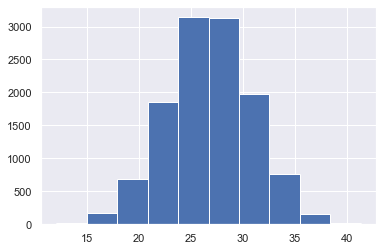

In [191]:

# Ideal Histogram
# Generating random number

Mean= 26.815216
stdDev= 4.136823 
TotalValues=11935
tavg=np.random.normal(Mean,stdDev,TotalValues)
 
# Plotting histogram for the random tavg values
pd.Series(tavg).hist()

### tmin

<AxesSubplot:>

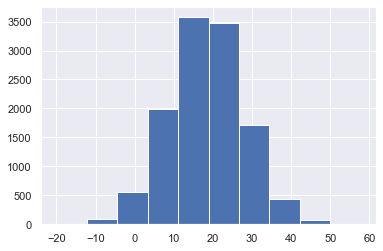

In [192]:

nMean= 18.343167
nstdDev= 9.394275
nTotalValues=11935
tmin=np.random.normal(nMean,nstdDev,nTotalValues)
 
# Plotting histogram for the random tmin values
pd.Series(tmin).hist()

In [193]:
 bhubhneshwar.describe()

,tavg,tmin,tmax,prcp,year,month,day
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,26.976260,18.543030,32.957225,7.119690,2005.990245,6.497311,15.711004
std,3.482796,9.224231,3.595113,15.659606,9.332001,3.450655,8.796984
min,16.100000,0.000000,21.800000,0.100000,1990.000000,1.000000,1.000000
25%,24.700000,15.100000,30.400000,4.052727,1998.000000,3.000000,8.000000
50%,27.700000,22.500000,32.800000,4.052727,2006.000000,7.000000,16.000000
75%,29.400000,25.300000,35.300000,4.052727,2014.000000,9.000000,23.000000
max,36.000000,30.700000,42.800000,470.900000,2022.000000,12.000000,31.000000


### tmax

<AxesSubplot:>

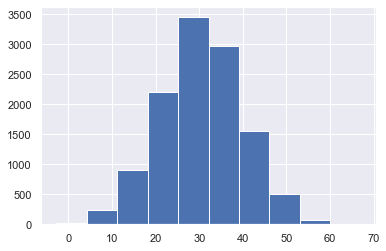

In [194]:

xMean= 30.533339 
xstdDev= 9.378371 
xTotalValues=11935
tmax=np.random.normal(xMean,xstdDev,xTotalValues)
 
# Plotting histogram for the random tmax value
pd.Series(tmax).hist()

### prcp

<AxesSubplot:>

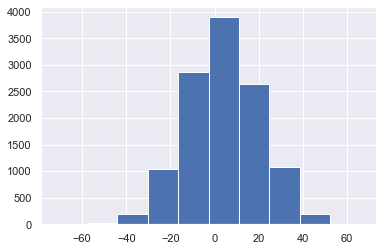

In [195]:

pMean= 4.052727
pstdDev= 16.386890 
pTotalValues=11935
prcp=np.random.normal(pMean,pstdDev,pTotalValues)
 
# Plotting histogram for the random prcp values
pd.Series(prcp).hist()

In [196]:
prcp

array([-35.67016334,  28.26533131,  15.87183167, ...,  17.56520715,
       -16.93870834,   6.3303538 ])

stat=0.99, p=0.000000000000000000005034173548
Not a normal distribution


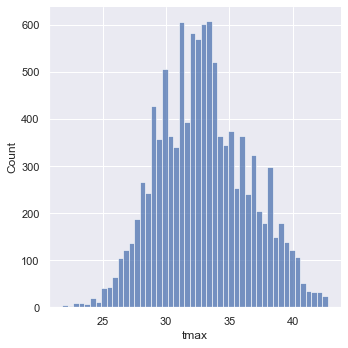

In [144]:

from scipy.stats import shapiro

DataToTest = bhubhneshwar['tmax']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('\nNormal distribution')
else:
    print('Not a normal distribution')
    
sns.displot(data=bhubhneshwar, x="tmax")

stat=0.80, p=0.000000000000000000000000000000
Not a normal distribution


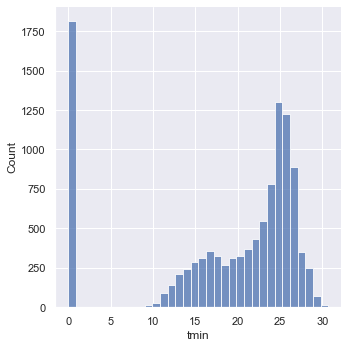

In [145]:

from scipy.stats import shapiro

DataToTest = bhubhneshwar['tmin']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('\nNormal distribution')
else:
    print('Not a normal distribution')
    
sns.displot(data=bhubhneshwar, x="tmin")

In [ ]:






from scipy.stats import shapiro

DataToTest = bhubhneshwar['tavg']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('\nNormal distribution')
else:
    print('Not a normal distribution')
    
sns.displot(data=bhubhneshwar, x="tavg")

In [ ]:
The Shapiro–Wilk test is essentially a goodness-of-fit test. That is, it examines how close the sample data fit to a normal distribution. 
It does this by ordering and standardizing the sample (standardizing refers to converting the data to a distribution with mean and standard deviation